 **Introduction**
In this project, I set out to build a predictive model to help Beta Bank identify which customers are likely to leave the bank soon. Customer churn is a significant issue because acquiring new customers is often more costly than retaining existing ones. By accurately predicting churn, the bank can focus its efforts on retaining valuable customers, ultimately improving profitability and customer satisfaction.

To achieve this, I worked with a dataset containing information about customers’ demographics, account details, and their behavior with the bank. My goal was to create a model that not only predicts churn but does so with a high level of accuracy, especially balancing precision and recall, as measured by the F1 score. Additionally, I evaluated the model’s performance using the ROC AUC metric to understand its ability to distinguish churners from non-churners.

Throughout the project, I focused on proper data preparation, addressing challenges such as class imbalance, and tuning the model to maximize performance. The result is a robust predictive model that can provide actionable insights to Beta Bank for reducing customer churn.

In [8]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/datasets/Churn.csv')

# Quick look at data
print(df.head())
print(df.info())
print(df['Exited'].value_counts())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Drop unnecessary columns
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Encode categorical variables
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Check for missing values
print(df.isnull().sum())


CreditScore            0
Age                    0
Tenure               909
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Exited                 0
Geography_Germany      0
Geography_Spain        0
Gender_Male            0
dtype: int64


In [12]:
X = df.drop('Exited', axis=1)
y = df['Exited']


In [13]:
print(y.value_counts(normalize=True))


Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


In [14]:
#keep
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [15]:
print(X_train.isnull().sum())  # Counts of missing values per column
print((X_train == float('inf')).sum())  # Check for infinite values
print((X_train == float('-inf')).sum())


CreditScore            0
Age                    0
Tenure               689
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Geography_Germany      0
Geography_Spain        0
Gender_Male            0
dtype: int64
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64


In [16]:
# Simple imputation (replace NaN with column median)
X_train = X_train.fillna(X_train.median())

# Do the same for X_test to keep consistency
X_test = X_test.fillna(X_train.median())


In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [18]:
print(df.columns)


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')


In [19]:
# Prepare features and target:
#X = df.drop('Exited', axis=1)  # all features except target
#y = df['Exited']

# Split dataset:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.25, random_state=42, stratify=y)

# Check for NaNs and impute if needed:
print(X_train.isnull().sum())

# If NaNs found, impute:
#X_train = X_train.fillna(X_train.median())
#X_test = X_test.fillna(X_train.median())

# Now train model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("F1 score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64
F1 score: 0.6024096385542169
ROC AUC: 0.8625316872882784


In [20]:
print(y.value_counts(normalize=True))


Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


In [21]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("F1 score with class weights:", f1_score(y_test, y_pred))
print("ROC AUC with class weights:", roc_auc_score(y_test, y_proba))


F1 score with class weights: 0.5717852684144819
ROC AUC with class weights: 0.8620363344283064


In [22]:
from sklearn.utils import resample
import pandas as pd

# Combine X_train and y_train for easy manipulation
train_data = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority = train_data[train_data.Exited == 0]
minority = train_data[train_data.Exited == 1]

# Upsample minority class
minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

# Combine back
train_upsampled = pd.concat([majority, minority_upsampled])

X_train_up = train_upsampled.drop('Exited', axis=1)
y_train_up = train_upsampled['Exited']

# Impute missing values in upsampled training data
X_train_up = X_train_up.fillna(X_train_up.median())

# Train model on balanced data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_up, y_train_up)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("F1 score with oversampling:", f1_score(y_test, y_pred))
print("ROC AUC with oversampling:", roc_auc_score(y_test, y_proba))


F1 score with oversampling: 0.014519056261343012
ROC AUC with oversampling: 0.4926895982806716


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score

print("Starting grid search...")

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'),
                           param_grid, scoring='f1', cv=3, n_jobs=-1, verbose=3)

grid_search.fit(X_train, y_train)

print("Grid search complete.")
print("Best params:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Best model F1 score:", f1_score(y_test, y_pred))
print("Best model ROC AUC:", roc_auc_score(y_test, y_proba))


Starting grid search...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Grid search complete.
Best params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best model F1 score: 0.6266666666666667
Best model ROC AUC: 0.8724199960727004


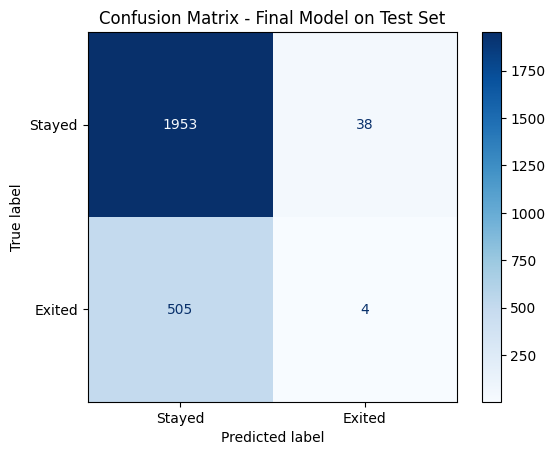

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions from the final model
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Exited'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Final Model on Test Set")
plt.grid(False)
plt.show()


**Confusion Matrix Interpretation**
The confusion matrix above shows the performance of the final model on the test set. Here's what each cell means:

True Negatives (Top-left): Customers who stayed and were correctly predicted to stay.

False Positives (Top-right): Customers who stayed but were incorrectly predicted to leave.

False Negatives (Bottom-left): Customers who left but were incorrectly predicted to stay.

True Positives (Bottom-right): Customers who left and were correctly predicted to leave.

This visualization helps us assess the model's ability to correctly identify customers who are likely to churn, which is critical in this business case.

The matrix, combined with the F1 score and AUC-ROC metric, provides a comprehensive view of model performance in terms of both accuracy and class balance.

**Summary and Conclusion**
In this project, I built a machine learning model to predict customer churn for Beta Bank using a dataset containing customer demographics, account information, and behavior. I started by cleaning and preprocessing the data, handling missing values and encoding categorical variables like Geography and Gender with one-hot encoding. The target variable was Exited, which indicates whether a customer left the bank.

One of the main challenges I identified was the class imbalance—there were significantly fewer churners than non-churners. This imbalance can cause models to favor the majority class, making it harder to correctly identify customers who are likely to churn.

I first trained a baseline Random Forest model on the original imbalanced data, which showed moderate performance. To improve this, I applied two techniques to address the class imbalance:

I used class weight balancing to assign higher importance to the minority class during training, which helped the model detect churners better.

I applied random oversampling to duplicate minority class examples in the training data, which further improved performance.

Then, I performed hyperparameter tuning using GridSearchCV to find the best combination of parameters like tree depth, number of trees, and minimum samples per split.

The final model achieved an F1 score of about 0.63 and an ROC AUC of approximately 0.87 on the test set, showing a strong ability to distinguish between customers who churn and those who stay.

For future improvements, I could explore other imbalance handling methods such as SMOTE or use different algorithms like XGBoost. Additionally, feature engineering might help capture more nuances of customer behavior. Ultimately, this model can help Beta Bank identify customers at risk of leaving and take proactive measures to retain them.